In [1]:
import numpy as np
import numba
import math
import matplotlib.pyplot as plt
from __future__ import division, print_function
from IPython.display import Image

El análisis de sentimietnos usa técnicas de mineria de datos y procesamiento de extracción y captura de datos para análisis con el objetivo de discernir la opnion sujetiva de documentos, reseñas, posts, articulos, opiniones en redes sociales como tweets, entre otros.



# Análisis de Sentimientos en Twitter

La mineria de opinión (Opinnion Mining) y análisis de sentimientos se focaliza en la detección de la carga emocional. En relación a esta carga se pueden distinguir algunos tipos de variables diferentes (Bravo-Marquez et al 2014):


- Polaridad: indica si el mensaje tiene un sentimiento positivo o negativo. En algunos análisis se introduce una tercera categoría para clasifcar los mensajes neutros.


- Intensidad: proporciona un valor numérico en relación con la intensidad del sentimiento. Se puede distinguir entre una intensidad positiva y una intensidad negativa.

- Emoción: Clasifca el texto según los distintos tipos de emociones, como puede ser la alegría, la tristeza o la ira. 

## Metodologías 

Las técnicas de análisis de sentimientos pueden ser dividias en dos grandes categorias, de acuerdo a Medhat et al(2014)

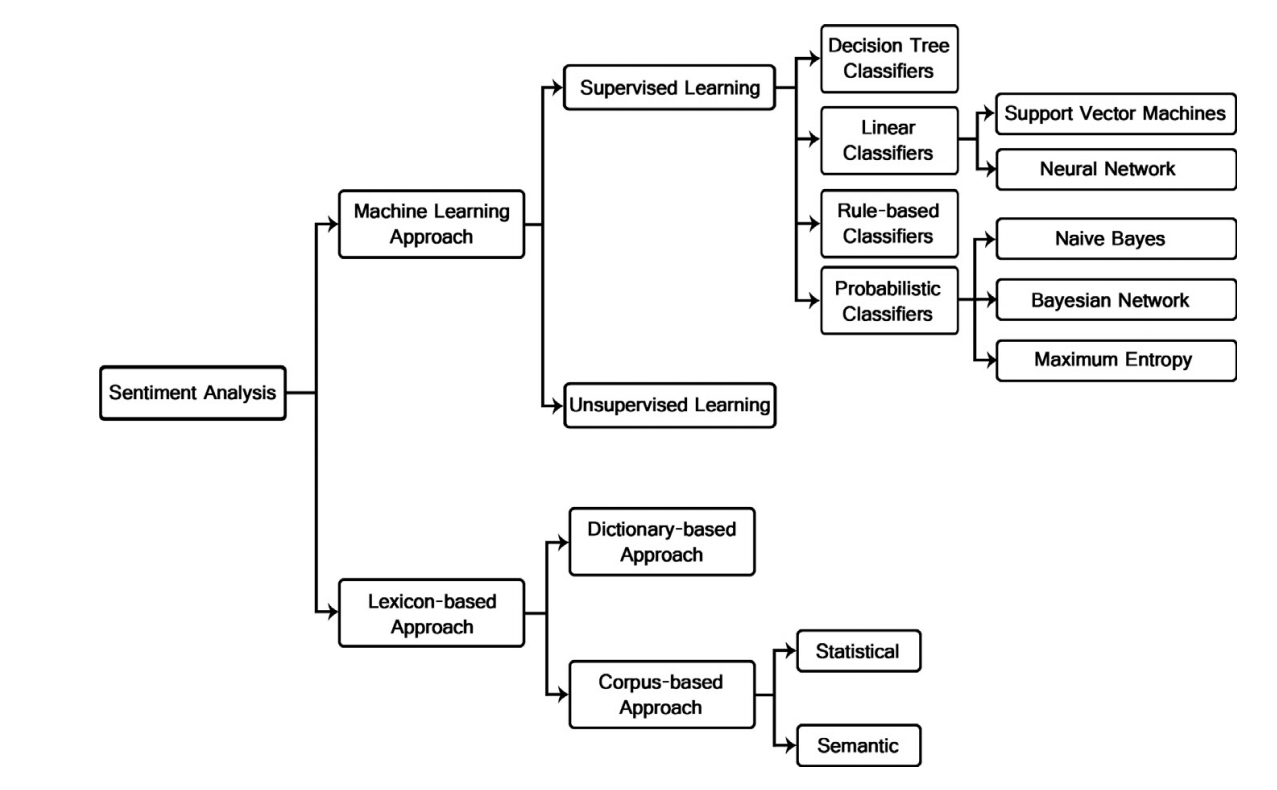

In [12]:
Image(filename='1.png',width='600')

### a) Enfoque basado en recursos léxicos (Lexicon-based Approach)

Los métodos encontrados en esta categoría tratan de realizar las clasificaciones de polaridad de los textos por medio de colecciones de elementos que han sido previamente analizados, a menudo en un proceso manual realizado por humanos con conocimiento de los términos (Devika et al., 2016). Es común que en los léxicos se marquen estos elementos con etiquetas que describan la connotación a la que tienden (negativo o positivo, en el caso más básico), o con valores numéricos en una escala predeterminada para indicar tanto su polaridad como su intensidad (-5 a +5, por ejemplo). Existen algunos diccionarios que además realizan una asociación de las palabras a distintos sentimientos, entre los que se pueden encontrar el enojo, la tristeza, el miedo o la sorpresa.

Esta técnica se rige por el uso de un diccionario que consiste en léxicos pre-etiquetados.
El tokenizador convierte el texto de entrada en tokens. Cada token nuevo encontrado
se compara con el léxico en el diccionario. Si hay una coincidencia positiva, la puntuación
se agrega al grupo total de puntuación para el texto de entrada. Por ejemplo, si
"dramático" es una coincidencia positiva en el diccionario, la puntuación total del texto
se incrementa. De lo contrario, la puntuación se reduce o la palabra se etiqueta como
negativa. Aunque esta técnica parece ser de naturaleza amateur, sus variantes han
demostrado ser dignas (Kamps et al., 2004). A continuación, en la figura 4 se muestra
como trabaja este enfoque.

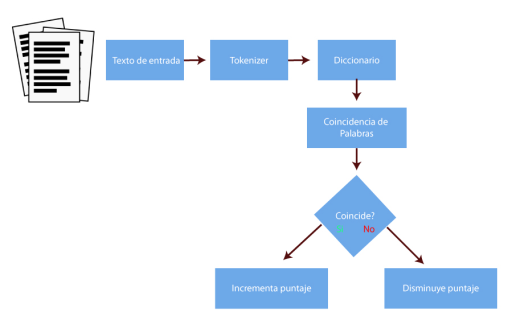

In [14]:
Image(filename='2.png',width='400')

### b) Enfoque de Machine Learning

Se compone de tres etapas: recopilación de datos, pre procesamiento, datos de
capacitación, clasificación y resultados de trazado. En los datos de capacitación, se proporciona una colección de corpus etiquetados. El clasificador presenta una serie de vectores de características de los datos anteriores. Se crea un modelo basado en el conjunto de datos de entrenamiento que se emplea sobre el texto nuevo / invisible para fines de clasificación. En la técnica de aprendizaje automático, la clave para la precisión de un clasificador es la selección de las características apropiadas. Generalmente, los unigramas (frases de una sola palabra), bigramas (dos frases consecutivas), trigramas (tres frases consecutivas) son seleccionados como vectores de características (Thakkar & Patel, 2010). 

La identificación de sentimientos en su contenido se centra alrededor de técnicas relacionadas a la inteligencia artificial utilizadas en conjunto con grandes volúmenes de datos. La aplicación de técnicas estadísticas sobre un set de datos es lo que le permite a una computadora aprender y realizar las predicciones oclasificaciones correspondientes, aunque puede que estas no siempre sean acertadas.

### ML - Aprendizaje supervisado

Las técnicas de aprendizaje supervisado están relacionadas con la existencia de
conjuntos de datos de entrenamiento etiquetados (Hassan et al., 2010). Las etiquetas de polaridad, al igual que en el enfoque basado en léxicos, suelen indicar si el mensaje tiene una connotación positiva o negativa, y pueden extenderse para describir neutralidad, falta de emoción o diversas intensidades. Los procesos de clasificación de los datos de entrenamiento tienden a ser realizados por equipos de humanos que leen, interpretan y asignan la etiqueta idónea para cada mensaje

El aprendizaje supervisado se utiliza para descubrir qué se ha aprendido del pasado a los datos nuevos. En el aprendizaje supervisado, se da un conjunto de datos de capacitación y ya tienen la idea de lo que se verá como resultado, incluso saben que hay una correlación de la vista y el logro correcto (Punde & Wagh, 2018).

Una vez que se ha determinado el set de entrenamiento, cada mensaje etiquetado
es procesado para realizar una extracción de características. Se debe prestar especial atención a la selección de las mismas, ya que éstas, al igual que el algoritmo de aprendizaje automático elegido para la tarea, tendrán un impacto sobre el desempeño del clasificador resultante.



#### Limitaciones 
La mayor limitación asociada con el aprendizaje supervisado es que es sensible a la cantidad y calidad de los datos de entrenamiento y puede fallar cuando los datos de entrenamiento son sesgados o insuficientes. La detección de opinión a nivel de subdocumento plantea desafíos adicionales para los enfoques basados en el aprendizaje supervisado porque existe poca información para el clasificador
(Madhoushi et al., 2015)

### ML - Aprendizaje no supervisado

En la clasificación de texto, a veces es difícil crear documentos de capacitación
etiquetados, pero es fácil recopilar los documentos no etiquetados. Los métodos de
aprendizaje sin supervisión superan estas dificultades (Madhoushi et al., 2015).

El objetivo de este enfoque es tomar ventaja de la vasta cantidad de mensajes,
originalmente sin anotaciones de polaridad en su estado natural, para mejorar la
eficacia de los clasificadores; esto se logra por medio de un proceso iterativo en el
que se combina el uso de datos etiquetados y no etiquetados (Davidov et al., 2010).
Los pasos básicos para llevar a cabo el método semi- supervisado involucran, en una
primera instancia, preparar un clasificador con el corpus de mensajes de
entrenamiento que incluye etiquetas de polaridad. Una vez finalizado el primer
entrenamiento del modelo, se aplica el clasificador sobre un segundo corpus
compuesto por datos no etiquetados para generar probabilidades de clases de
sentimiento para cada mensaje. De los resultados se seleccionan aquellas
publicaciones con una alta probabilidad para integrarse al corpus de entrenamiento,
mientras que el resto se queda en el set no etiquetado. El proceso se puede repetir
por un número definido de iteraciones o hasta que el estado del corpus de
entrenamiento sea satisfactorio.

#### Limitaciones
La limitación de los enfoques no supervisados es que normalmente necesitan un gran
volumen de datos para ser entrenados con precisión. Los modelos totalmente sin
supervisión a menudo producen temas incoherentes porque las funciones objetivas
de los modelos de temas no siempre se correlacionan bien con los juicios humanos.
A pesar de esta desventaja, el aprendizaje no supervisado aún nos ofrece una forma
de obtener conocimiento sobre los datos sin ninguna anotación (Madhoushi et al.,
2015)

## Un tercer enfoque - Enfoque hibrido

Este enfoque trata de mejorar el desempeño de los clasificadores automáticos
complementando los enfoques descritos hasta el momento por medio de la
combinación de dos o más de sus técnicas. Por ejemplo, en este grupo se ubican los
trabajos que experimentan con el uso de un clasificador SVM o Naive Bayes, los dos del
tipo de aprendizaje automático supervisado, alimentado por puntuaciones realizadas
por un proceso en base a léxico (Kolchyna et al., 2015)(Rathi et al., 2018). De la misma
forma califican aquellos estudios que realizan minería de opiniones por medio de una
combinación de SVM y redes neuronales (Rosa et al., 2017), ambos del área del
aprendizaje automático supervisado y no supervisado, respectivamente. En los dos
trabajos anteriores, los investigadores reportan haber obtenido resultados superadores
en el caso de los métodos híbridos en comparación a las soluciones que se centraron
únicamente en resolver el problema con un enfoque, ya sean basadas en léxico o en
aprendizaje automático.

## Estado del arte

### Reseñas de articulos con diferentes algoritmos de uso para el análisis de sentimientos

- En [1] Meylan Wongkar y Apriandy Angdresey definen el análisis de sentimiento como la actividad para distinguir el nivel de sentimiento u opinión pública y presentan un estudio de las
opiniones expresadas de los usuarios en Twitter sobre las elecciones presidenciales mediante
una aplicación de Python. El análisis consiste en recopilar datos mediante las bibliotecas que
ofrece Python, el procesamiento de texto y pruebas de datos de entrenamiento y la clasificación
de texto empleando el método de Naive Bayes. Los resultados arrojados por la aplicación mostraron el valor de la polaridad del sentimiento positivo y negativo de los candidatos y mediante
un programa informático de análisis y minería de datos se realizó una comparación entre otros
algoritmos como Support Vector Machines (SVM) y K-Nerther Neighbor (K-NN) para conocer
la precisión de cada uno.

 - En [2] V. Prakruthi, D. Sindhu y Dr. S. Anupama Kumar tratan el análisis de sentimientos como la aplicación para procesar el lenguaje natural, el análisis de textos, la lingüística computacional y la biometría para reconocer, extraer, cuantificar y aprender estados afectivos e información subjetiva. El análisis lo realizan a un conjunto de mensajes o tweets publicados por usuariossobre una persona, tendencia, producto o marca en la red social Twitter con el objetivo de evaluar el sentimiento. Los datos se extraen mediante una plataforma de desarrollo que ofrece una API y que permite acceder a los datos publicados con el fin de realizar la implementación de una aplicación, clasificar y representar los sentimientos expresados en los comentarios como negativos, neutrales y positivos utilizando técnicas de visualización como el histograma y el gráfico circular.

 - En [3] utilizan PLN (procesamiento del lenguaje natural) para analizar el sentimiento y determinar el tipo de opinión o la polaridad de las publicaciones realizadas en Twitter. Esta técnica consiste en la tokenización que significa dividir las cadenas de texto extensas en piezas más pequeñas o tokens. Los enfoques de los autores Kusrini y Mochamad Mashuri se centran en el desarrollo del análisis utilizando léxicos y polaridad de multiplicación, pero los resultados son mas imprecisos después de realizar una comparación con el aprendizaje automático

- En [4] se enfocan en la gran cantidad de datos de Twitter para realizar un análisis de los sentimientos de la información y lo definen como un área de la minería de datos de texto y PLN. Los autores Rasika Wagh y Payal Punde presentan los tipos de análisis de sentimientos, los métodos que se utilizan para clasificar los sentimientos extraídos de los tweets como Naïve-Bayes, SVM y Entropía máxima y un estudio para comparar los resultados de las diferentes técnicas. Los enfoques fundamentales en el análisis de sentimientos son el enfoque de aprendizaje supervisado y el enfoque de aprendizaje no supervisado.

 - En [5] Sahar A. El Rahman, Feddah Alhumaidi AlOtaibi y Wejdan Abdullah AlShehri presentan un modelo para realizar un análisis de sentimientos de datos reales extraídos de Twitter combinando el uso de algoritmos de aprendizaje automático supervisados y no supervisados. Las etapas que aplican para el análisis parten del acceso de la información directamente tomada de la API de Twitter, seguido del preprocesamiento de los datos con el objetivo de entrenar la información resultante en un modelo basado en léxico y clasificar los tweets en sentimiento positivo, negativo o neutral

 - En [6] Dionysis Goularas y Sani Kamis realizan una comparación de varios métodos de aprendizaje profundo utilizados para el análisis de sentimientos en los datos de Twitter. Particularmente utilizan dos categorías derivadas de las redes neuronales; las redes neuronales convolucionales (CNN), y las redes neuronales recurrentes (RNN) que comúnmente se aplican en tareas de procesamiento del lenguaje natural (PLN)

- En [7], según los autores Lei Wang, Jianwei Niu y Shui Yu, los patrones de difusión de sentimientos en Twitter se relacionan ligeramente con las polaridades de sentimiento de los mensajes de Twitter. El enfoque que proporcionan se basa en fusionar información textual de los
mensajes de Twitter y los patrones de difusión de sentimientos para mejorar el rendimiento del análisis en los datos de Twitter. El proceso para fusionar la información inicialmente consta del análisis de la difusión de la opinión a partir de la investigación de un fenómeno llamado inversión de la opinión cuyo motivo es encontrar algunas propiedades. Posterior se consideran las relaciones entre la información textual de los tweets y los patrones de difusión de sentimientos con el fin de implementar un algoritmo llamado SentiDiff que permite predecir o clasificar las polaridades de los sentimientos expresados en los mensajes de Twitter.

 - En [8], de acuerdo con los autores Md. Rakibul Hasan, Maisha Maliha y M. Arifuzzaman, el
proceso de filtraje de los datos de twitter se realiza mediante un marco de datos preprocesados
basados en el procesamiento del lenguaje natural (PLN). Los resultados del análisis de sentimientos se fundamentan en los modelos Bag of Words (BoW) y Término Frecuencia-Frecuencia
Inversa de Documentos (TF-IDF) que finalmente clasifican los tweets en positivos y negativos
con una alta precisión.

### Reseñas de articulos de analisis de sentimientos aplicados a politicas públicas

## Referencias

Bravo-Marquez, F.; Mendoza, M. & Poblete, B. (2014): “Meta-level sentiment models
for big social data analysis”, Knowledge-Based Systems, vol. 69, no 1, pp. 86–99. http://
dx.doi.org/ 10.1016/j.knosys.2014.05.016

Rupali P. Jondhale, Manisha P. Mali" Study on Distinct Approaches for Sentiment Analysis", International Journal of Computer Applications (0975 – 8887) Volume 111 – No 17, February 2015.

Medhat, W.; Hassan, A. & Korashy, H. (2014): “Sentiment analysis algorithms and
applications: A survey”, Ain Shams Engineering Journal, vol. 5, no 4, pp. 1093–1113.
http://dx.doi.org/10.1016/j.asej.2014.04.011

[1] Meylan Wongkar y Apriandy Angdresey. «Sentiment Analysis Using Naive Bayes Algorithm Of The Data Crawler: Twitter». En: 2019 Fourth International Conference on Informatics and Computing (ICIC). 2019, págs. 1-5

[2] V. Prakruthi, D. Sindhu y Dr. S. Anupama Kumar. «Real Time Sentiment Analysis Of Twitter Posts». En: 2018 3rd International Conference on Computational Systems and Information Technology for Sustainable Solutions (CSITSS). 2018, págs. 29-34

[3] Kusrini y Mochamad Mashuri. «Sentiment Analysis In Twitter Using Lexicon Based and
Polarity Multiplication». En: 2019 International Conference of Artificial Intelligence and Information Technology (ICAIIT). 2019, págs. 365-368

[4] Rasika Wagh y Payal Punde. «Survey on Sentiment Analysis using Twitter Dataset». En:
2018 Second International Conference on Electronics, Communication and Aerospace Technology
(ICECA). 2018, págs. 208-211

[5] Sahar A. El Rahman, Feddah Alhumaidi AlOtaibi y Wejdan Abdullah AlShehri. «Sentiment Analysis of Twitter Data». En: 2019 International Conference on Computer and Information Sciences (ICCIS). 2019, págs. 1-4.

[6] Dionysis Goularas y Sani Kamis. «Evaluation of Deep Learning Techniques in Sentiment
Analysis from Twitter Data». En: 2019 International Conference on Deep Learning and Machine Learning in Emerging Applications (Deep-ML). 2019, págs. 12-17

[7] Lei Wang, Jianwei Niu y Shui Yu. «SentiDiff: Combining Textual Information and Sentiment Diffusion Patterns for Twitter Sentiment Analysis». En: IEEE Transactions on Knowledge and Data Engineering 32.10 (2020), págs. 2026-2039

[8] Md. Rakibul Hasan, Maisha Maliha y M. Arifuzzaman. «Sentiment Analysis with NLP on Twitter Data». En: 2019 International Conference on Computer, Communication, Chemical, Materials and Electronic Engineering (IC4ME2). 2019, págs. 1-4.